<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.700603,55.565178,30.270685,-39.048507,116.487959,150.215045,-33.727086
1,0.0,1.0,56.195288,22.786742,75.534870,2.002607,166.519508,148.546508,17.973000
2,0.0,2.0,36.185916,95.849370,21.644038,37.796100,201.475425,176.292985,25.182439
3,0.0,3.0,93.718231,41.994497,55.289162,28.676109,229.678000,182.058587,47.619413
4,0.0,4.0,44.810560,78.425739,97.422130,-110.800618,119.857811,232.602674,-112.744863
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.013707,98.197220,48.385891,-66.310764,143.286054,203.568278,-60.282225
59996,999.0,56.0,38.417319,80.379754,39.286930,24.868892,192.952894,164.999557,27.953338
59997,999.0,57.0,84.537959,88.854545,97.048503,-203.851926,76.589080,267.020228,-190.431147
59998,999.0,58.0,49.967593,90.182963,20.302199,-67.352494,103.100261,172.679130,-69.578869


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    59.700603  55.565178  30.270685  -39.048507  116.487959   
      1.0    56.195288  22.786742  75.534870    2.002607  166.519508   
      2.0    36.185916  95.849370  21.644038   37.796100  201.475425   
      3.0    93.718231  41.994497  55.289162   28.676109  229.678000   
      4.0    44.810560  78.425739  97.422130 -110.800618  119.857811   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.013707  98.197220  48.385891  -66.310764  143.286054   
      56.0   38.417319  80.379754  39.286930   24.868892  192.952894   
      57.0   84.537959  88.854545  97.048503 -203.851926   76.589080   
      58.0   49.967593  90.182963  20.302199  -67.352494  103.100261   
      59.0   86.993382  20.833102  30.515984   26.237655  174.580122   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    150.215045  -33.727086  
      1.0    148.546508   17.973000  
      2.0    176.292985   25.182439  
      3.0    182.058587   47.619413  
      4.0    232.602674 -112.744863  
...                 ...         ...  
999.0 55.0   203.568278  -60.282225  
      56.0   164.999557   27.953338  
      57.0   267.020228 -190.431147  
      58.0   172.679130  -69.578869  
      59.0   162.745439   11.834683  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    59.700603  55.565178  30.270685  -39.048507  116.487959   
      1.0    56.195288  22.786742  75.534870    2.002607  166.519508   
      2.0    36.185916  95.849370  21.644038   37.796100  201.475425   
      3.0    93.718231  41.994497  55.289162   28.676109  229.678000   
      4.0    44.810560  78.425739  97.422130 -110.800618  119.857811   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.013707  98.197220  48.385891  -66.310764  143.286054   
      56.0   38.417319  80.379754  39.286930   24.868892  192.952894   
      57.0   84.537959  88.854545  97.048503 -203.851926   76.589080   
      58.0   49.967593  90.182963  20.302199  -67.352494  103.100261   
      59.0   86.993382  20.833102  30.515984   26.237655  174.580122   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    150.215045  -33.727086  
      1.0    148.546508   17.973000  
      2.0    176.292985   25.182439  
      3.0    182.058587   47.619413  
      4.0    232.602674 -112.744863  
...                 ...         ...  
999.0 55.0   203.568278  -60.282225  
      56.0   164.999557   27.953338  
      57.0   267.020228 -190.431147  
      58.0   172.679130  -69.578869  
      59.0   162.745439   11.834683  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.700603,55.565178,30.270685,-39.048507,116.487959,150.215045,-33.727086
1,0.0,1.0,56.195288,22.786742,75.534870,2.002607,166.519508,148.546508,17.973000
2,0.0,2.0,36.185916,95.849370,21.644038,37.796100,201.475425,176.292985,25.182439
3,0.0,3.0,93.718231,41.994497,55.289162,28.676109,229.678000,182.058587,47.619413
4,0.0,4.0,44.810560,78.425739,97.422130,-110.800618,119.857811,232.602674,-112.744863
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.013707,98.197220,48.385891,-66.310764,143.286054,203.568278,-60.282225
59996,999.0,56.0,38.417319,80.379754,39.286930,24.868892,192.952894,164.999557,27.953338
59997,999.0,57.0,84.537959,88.854545,97.048503,-203.851926,76.589080,267.020228,-190.431147
59998,999.0,58.0,49.967593,90.182963,20.302199,-67.352494,103.100261,172.679130,-69.578869


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    59.700603  55.565178  30.270685  -39.048507  116.487959   
      1.0    56.195288  22.786742  75.534870    2.002607  166.519508   
      2.0    36.185916  95.849370  21.644038   37.796100  201.475425   
      3.0    93.718231  41.994497  55.289162   28.676109  229.678000   
      4.0    44.810560  78.425739  97.422130 -110.800618  119.857811   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.013707  98.197220  48.385891  -66.310764  143.286054   
      56.0   38.417319  80.379754  39.286930   24.868892  192.952894   
      57.0   84.537959  88.854545  97.048503 -203.851926   76.589080   
      58.0   49.967593  90.182963  20.302199  -67.352494  103.100261   
      59.0   86.993382  20.833102  30.515984   26.237655  174.580122   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    150.215045  -33.727086  
      1.0    148.546508   17.973000  
      2.0    176.292985   25.182439  
      3.0    182.058587   47.619413  
      4.0    232.602674 -112.744863  
...                 ...         ...  
999.0 55.0   203.568278  -60.282225  
      56.0   164.999557   27.953338  
      57.0   267.020228 -190.431147  
      58.0   172.679130  -69.578869  
      59.0   162.745439   11.834683  

[60000 rows x 7 columns]

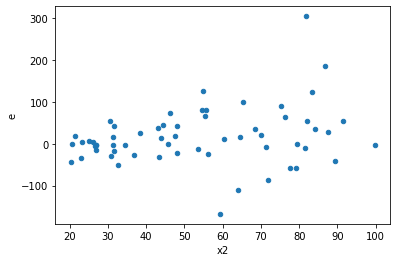

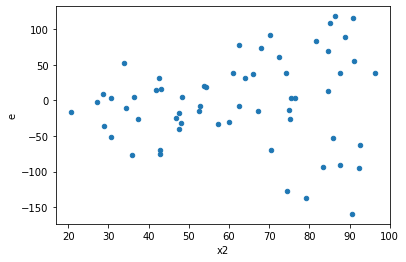

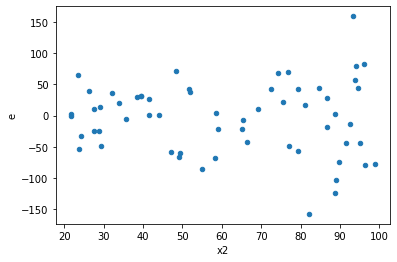

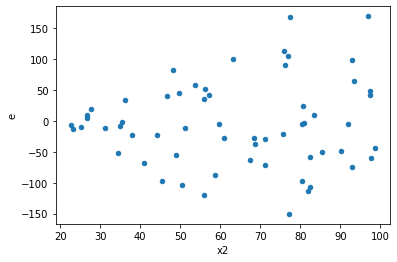

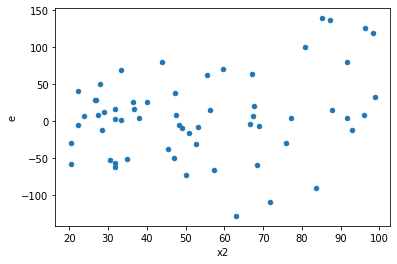

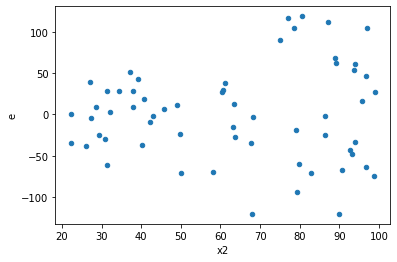

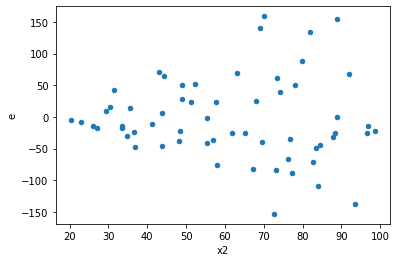

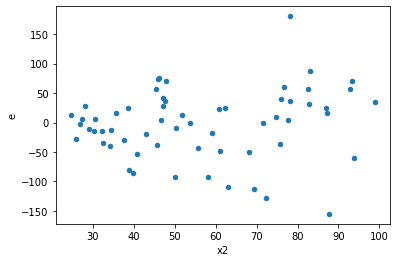

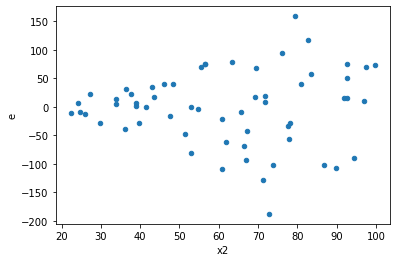

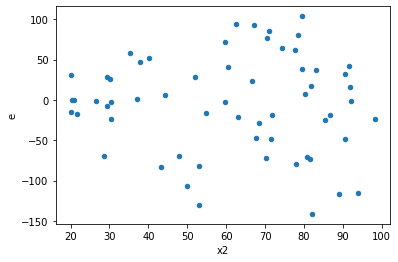

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,34.0,20.0,115895.67529164892,119237.74284643646,3408.6963321073213,5961.887142321823,1.7490226648133453,0.18860875834535307,0.9056956208273235,0.09430437917267653,Reject005=1 : Homoscedasticity
4.0,27.0,27.0,67854.36707047881,110313.66585575644,2513.12470631403,4085.691327990979,1.625741578890215,0.21316087304169806,0.893419563479151,0.10658043652084903,Reject005=1 : Homoscedasticity
5.0,22.0,32.0,16421.164600018194,106144.67821306559,746.4165727280997,3317.0211941582997,4.443927580593264,0.00014383758702463112,0.9999280812064877,7.191879351231556e-05,Reject005=0 : Heteroscedasticity
7.0,29.0,25.0,97267.48341343635,107161.86089598962,3354.0511521874605,4286.474435839585,1.2779991244450795,0.5369473746732156,0.7315263126633922,0.2684736873366078,Reject005=1 : Homoscedasticity
8.0,27.0,27.0,27800.627240843532,201941.76908686967,1029.6528607719827,7479.324780995173,7.26392851993588,1.912792098046623e-06,0.999999043603951,9.563960490233114e-07,Reject005=0 : Heteroscedasticity
9.0,30.0,24.0,84750.19114714913,115428.83837534633,2825.006371571638,4809.534932306097,1.7024864016962926,0.18483223696948725,0.9075838815152564,0.09241611848474363,Reject005=1 : Homoscedasticity
11.0,28.0,26.0,94387.01633071792,121417.58318806133,3370.9648689542114,4669.9070456946665,1.3853324573932542,0.4064448978679116,0.7967775510660442,0.2032224489339558,Reject005=1 : Homoscedasticity
12.0,27.0,27.0,43135.24944201689,126808.6329333103,1597.6018311858106,4696.616034567049,2.9397913440553665,0.0066634744443434535,0.9966682627778283,0.0033317372221717267,Reject005=0 : Heteroscedasticity
13.0,27.0,27.0,80334.98571299837,172509.6804870133,2975.369841222162,6389.247425444937,2.147379239019406,0.05185755069280873,0.9740712246535956,0.025928775346404365,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,33.0,89104.73054298971,89974.11482386591,4243.082406809034,2726.4883279959367,0.6425725608394119,0.28977985384015037,Reject005=1 : Homoscedasticity
1.0,29.0,25.0,134678.4997130285,82037.53260235352,4644.086197000983,3281.501304094141,0.7065978461410212,0.36669495949136416,Reject005=1 : Homoscedasticity
2.0,21.0,33.0,105474.08258265958,51088.70516322503,5022.575361079028,1548.1425807037888,0.3082368047079323,0.006199911226196195,Reject005=0 : Heteroscedasticity
3.0,34.0,20.0,115895.67529164892,119237.74284643646,3408.6963321073213,5961.887142321823,1.7490226648133453,0.18860875834535307,Reject005=1 : Homoscedasticity
4.0,27.0,27.0,67854.36707047881,110313.66585575644,2513.12470631403,4085.691327990979,1.625741578890215,0.21316087304169806,Reject005=1 : Homoscedasticity
5.0,22.0,32.0,16421.164600018194,106144.67821306559,746.4165727280997,3317.0211941582997,4.443927580593264,0.00014383758702463112,Reject005=0 : Heteroscedasticity
6.0,22.0,32.0,107391.88487022852,58011.97338980256,4881.4493122831145,1812.87416843133,0.3713803119638307,0.018011408822935265,Reject005=0 : Heteroscedasticity
7.0,29.0,25.0,97267.48341343635,107161.86089598962,3354.0511521874605,4286.474435839585,1.2779991244450795,0.5369473746732156,Reject005=1 : Homoscedasticity
8.0,27.0,27.0,27800.627240843532,201941.76908686967,1029.6528607719827,7479.324780995173,7.26392851993588,1.912792098046623e-06,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      598
Reject005=0 : Heteroscedasticity    402
Name: Result_test, dtype: int64